In [0]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks")

In [0]:
players = pd.read_csv('sample_data/Players.csv')
stats = pd.read_csv('sample_data/Seasons_Stats.csv')

In [4]:
players.head()

,Unnamed: 0,Player,height,weight,collage,born,birth_city,birth_state
0,0,Curly Armstrong,180.0,77.0,Indiana University,1918.0,NaN,NaN
1,1,Cliff Barker,188.0,83.0,University of Kentucky,1921.0,Yorktown,Indiana
2,2,Leo Barnhorst,193.0,86.0,University of Notre Dame,1924.0,NaN,NaN
3,3,Ed Bartels,196.0,88.0,North Carolina State University,1925.0,NaN,NaN
4,4,Ralph Beard,178.0,79.0,University of Kentucky,1927.0,Hardinsburg,Kentucky


In [5]:
stats.head()

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,blanl,OWS,DWS,WS,WS/48,blank2,OBPM,DBPM,BPM,VORP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,0.368,NaN,0.467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.1,3.6,3.5,NaN,NaN,NaN,NaN,NaN,NaN,144.0,516.0,0.279,NaN,NaN,NaN,144.0,516.0,0.279,0.279,170.0,241.0,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,0.435,NaN,0.387,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.6,0.6,2.2,NaN,NaN,NaN,NaN,NaN,NaN,102.0,274.0,0.372,NaN,NaN,NaN,102.0,274.0,0.372,0.372,75.0,106.0,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,0.394,NaN,0.259,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.9,2.8,3.6,NaN,NaN,NaN,NaN,NaN,NaN,174.0,499.0,0.349,NaN,NaN,NaN,174.0,499.0,0.349,0.349,90.0,129.0,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,0.312,NaN,0.395,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.5,-0.1,-0.6,NaN,NaN,NaN,NaN,NaN,NaN,22.0,86.0,0.256,NaN,NaN,NaN,22.0,86.0,0.256,0.256,19.0,34.0,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,0.308,NaN,0.378,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.5,-0.1,-0.6,NaN,NaN,NaN,NaN,NaN,NaN,21.0,82.0,0.256,NaN,NaN,NaN,21.0,82.0,0.256,0.256,17.0,31.0,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0


In [0]:
players.dropna(subset=['Player'], how='all', inplace = True)
stats.dropna(subset=['Player'], how='all', inplace = True)
try:
    del stats['blanl']
    del stats['blank2']
except:
    print('уже удалено')

In [7]:
print(players.shape, stats.shape)

(3921, 8) (24624, 51)


In [0]:
def nul_deletion(data, coef):
    for col in data.columns:
        temp_null_count = data[data[col].isnull()].shape[0]
        if temp_null_count>data[col].shape[0]*coef:
            del data[col]
        else:
            if data[col].dtype != 'O':
                data[col]=data[col].fillna(data[col].median())
            else:
                data.fillna(method='bfill', inplace =True)
                data.fillna(method='ffill', inplace =True)

In [0]:
nul_deletion(players, 0.3)
nul_deletion(stats, 0.3)

In [11]:
print(players.shape, stats.shape)

(3921, 8) (24624, 51)


In [0]:
players.rename(columns={'Unnamed: 0': 'Player_id'}, inplace=True)
stats.rename(columns={'Unnamed: 0': 'Player_id'}, inplace=True)

In [0]:
def first(data):
    return data.iloc[0]

In [14]:
first_keys=['Player_id','Year', 'Age', 'Player', 'Pos', 'Tm']
col_agg_d= {}
col_agg_d.update(dict.fromkeys(first_keys, lambda d: d.iloc[0]))
col_agg_d.update(dict.fromkeys(stats.columns[6:], np.mean))
stats=stats.groupby(['Player']).agg(col_agg_d).sort_values(('Player_id'), ascending=True)
stats = stats.reset_index(drop=True)
for i in range(stats.shape[0]):
    stats.at[i, 'Player_id'] = i
stats.head()

,Player_id,Year,Age,Player,Pos,Tm,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0,1950.0,31.0,Curly Armstrong,G-F,FTW,50.500000,80.0,2939.0,25.50,0.370000,0.001,0.427500,11.4,28.6,16.8,13.5,1.5,2.3,16.6,21.1,-2.000000e-01,2.25,2.050,0.261000,-0.7,1.7,1.0,1.8,108.0,374.000000,0.294500,0.0,1.0,0.0,108.0,374.000000,0.294500,0.294500,114.000000,165.5,0.674500,259.0,664.0,364.500000,126.5,80.0,104.0,14.0,157.000000,330.000000
1,1,1950.0,29.0,Cliff Barker,SG,INO,49.666667,80.0,2124.0,20.60,0.366667,0.001,0.361667,11.4,28.6,16.8,13.5,1.5,2.3,16.6,21.1,3.700743e-17,0.70,0.700,0.176667,-0.7,1.7,1.0,1.8,67.0,212.333333,0.307333,0.0,1.0,0.0,67.0,212.333333,0.307333,0.307333,51.666667,78.0,0.648333,259.0,664.0,273.666667,98.0,80.0,104.0,14.0,84.333333,185.666667
2,2,1950.0,25.0,Leo Barnhorst,SF,CHS,68.800000,80.0,2631.4,17.52,0.395800,0.001,0.208800,11.4,28.6,16.8,13.5,1.5,2.3,16.6,21.1,3.000000e-01,2.40,2.680,0.127400,-0.7,1.7,1.0,1.8,271.2,737.800000,0.362200,0.0,1.0,0.0,271.2,737.800000,0.362200,0.362200,104.000000,156.4,0.676800,259.0,664.0,429.200000,223.2,80.0,104.0,14.0,206.600000,646.400000
3,3,1950.0,24.0,Ed Bartels,F,TOT,11.750000,80.0,2939.0,25.50,0.325750,0.001,0.499250,11.4,28.6,16.8,13.5,1.5,2.3,16.6,21.1,-4.500000e-01,0.00,-0.425,0.261000,-0.7,1.7,1.0,1.8,17.0,67.250000,0.252250,0.0,1.0,0.0,17.0,67.250000,0.252250,0.252250,15.500000,28.5,0.574000,259.0,664.0,501.000000,13.0,80.0,104.0,14.0,28.000000,49.500000
4,4,1950.0,22.0,Ralph Beard,G,INO,63.000000,80.0,2939.0,25.50,0.428500,0.001,0.321000,11.4,28.6,16.8,13.5,1.5,2.3,16.6,21.1,3.850000e+00,1.75,5.650,0.261000,-0.7,1.7,1.0,1.8,374.5,1023.000000,0.365500,0.0,1.0,0.0,374.5,1023.000000,0.365500,0.365500,254.000000,330.0,0.768500,259.0,664.0,445.500000,275.5,80.0,104.0,14.0,114.000000,1003.000000


In [0]:
players_with_stats = pd.merge(players, stats, left_on='Player_id', right_on='Player_id', how='inner')
players_with_stats.rename(columns={'Player_x': 'Player'}, inplace=True)
try:
    del players_with_stats['Player_y']
except:
    pass

In [0]:
def col_del(data, cols):
    try:
        for col in cols:
            del data[col]
    except:
        print("Столбец не найден")
    print(data.shape)

In [0]:
def show_cor(data):
    fig, ax = plt.subplots(figsize=(15,15)) 
    mask = np.zeros_like(data.corr(), dtype=np.bool)
    mask[np.tril_indices_from(mask)] = True
    sns.heatmap(data.corr(), mask=mask, fmt='.3f')

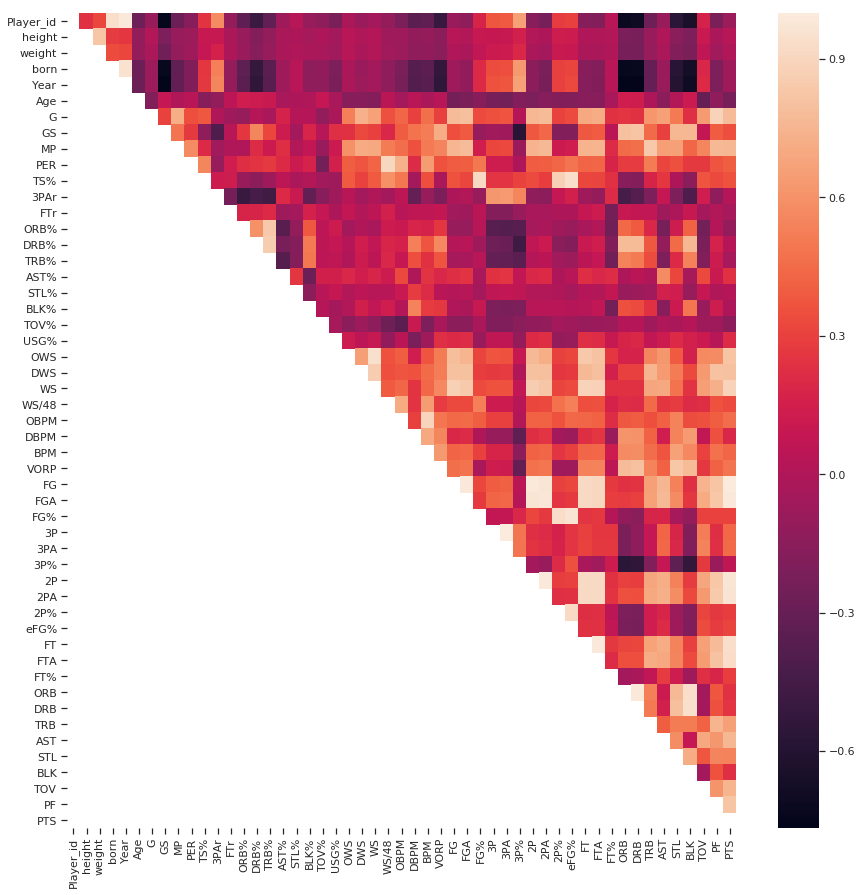

In [18]:
show_cor(players_with_stats)


In [19]:
col_del(players_with_stats, ['Tm','collage', 'born', 'birth_city', 'birth_state', 'Year', 'BPM', '2P%', 
                             'FT', 'FTA', 'FG%', 'TS%', 'MP', '2PA', 'FGA', 'WS', '3PA', 'FG', 'TRB%'])

(3920, 38)


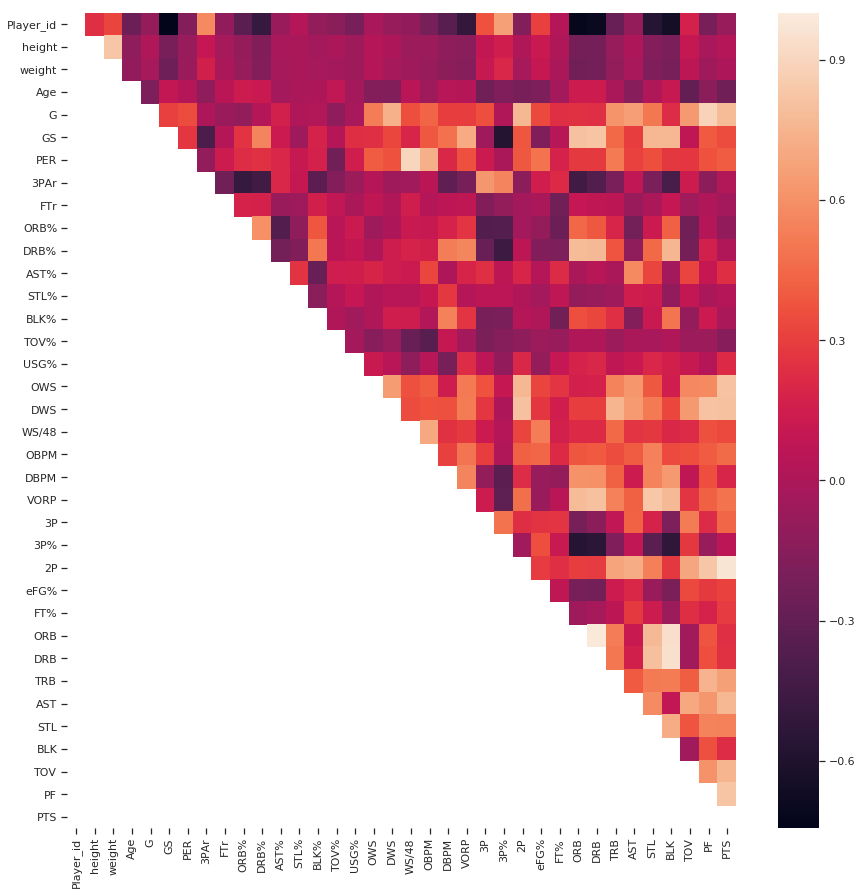

In [20]:
show_cor(players_with_stats)

In [21]:
players_with_stats.head()

,Player_id,Player,height,weight,Age,Pos,G,GS,PER,3PAr,FTr,ORB%,DRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS/48,OBPM,DBPM,VORP,3P,3P%,2P,eFG%,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0,Curly Armstrong,180.0,77.0,31.0,G-F,50.500000,80.0,25.50,0.001,0.427500,11.4,28.6,13.5,1.5,2.3,16.6,21.1,-2.000000e-01,2.25,0.261000,-0.7,1.7,1.8,0.0,0.0,108.0,0.294500,0.674500,259.0,664.0,364.500000,126.5,80.0,104.0,14.0,157.000000,330.000000
1,1,Cliff Barker,188.0,83.0,29.0,SG,49.666667,80.0,20.60,0.001,0.361667,11.4,28.6,13.5,1.5,2.3,16.6,21.1,3.700743e-17,0.70,0.176667,-0.7,1.7,1.8,0.0,0.0,67.0,0.307333,0.648333,259.0,664.0,273.666667,98.0,80.0,104.0,14.0,84.333333,185.666667
2,2,Leo Barnhorst,193.0,86.0,25.0,SF,68.800000,80.0,17.52,0.001,0.208800,11.4,28.6,13.5,1.5,2.3,16.6,21.1,3.000000e-01,2.40,0.127400,-0.7,1.7,1.8,0.0,0.0,271.2,0.362200,0.676800,259.0,664.0,429.200000,223.2,80.0,104.0,14.0,206.600000,646.400000
3,3,Ed Bartels,196.0,88.0,24.0,F,11.750000,80.0,25.50,0.001,0.499250,11.4,28.6,13.5,1.5,2.3,16.6,21.1,-4.500000e-01,0.00,0.261000,-0.7,1.7,1.8,0.0,0.0,17.0,0.252250,0.574000,259.0,664.0,501.000000,13.0,80.0,104.0,14.0,28.000000,49.500000
4,4,Ralph Beard,178.0,79.0,22.0,G,63.000000,80.0,25.50,0.001,0.321000,11.4,28.6,13.5,1.5,2.3,16.6,21.1,3.850000e+00,1.75,0.261000,-0.7,1.7,1.8,0.0,0.0,374.5,0.365500,0.768500,259.0,664.0,445.500000,275.5,80.0,104.0,14.0,114.000000,1003.000000


In [0]:
players_with_stats['Pos'].replace(to_replace = ['PF-C', 'PF-SF', 'PG-SG', 'SF-PF', 'SF-SG', 'SG-PG', 'SG-SF'], 
                                  value = ['PF', 'PF', 'PG', 'SF', 'SF','SG', 'SG'],inplace = True)

In [0]:
players_with_stats['Pos'].replace(to_replace = ['G-F', 'F', 'G', 'F-C', 'F-G', 'C-F', 'C-PF'], 
                                  value = ['SG', 'PF', 'PG', 'PF', 'SF', 'C', 'C'],inplace = True)

In [24]:
players_with_stats['Pos'].unique()

array(['SG', 'SF', 'PF', 'PG', 'C'], dtype=object)

In [0]:
Pos = players_with_stats['Pos']

In [26]:
le = LabelEncoder()
Pos_le = le.fit_transform(players_with_stats['Pos'])
pws = players_with_stats
print(Pos_le.shape, pws.shape)

(3920,) (3920, 38)


In [27]:
col_del(pws, ['Pos'])

(3920, 37)


In [28]:
col_del(pws, ['Player_id', 'Player'])

(3920, 35)


In [29]:
pws.head()

,height,weight,Age,G,GS,PER,3PAr,FTr,ORB%,DRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS/48,OBPM,DBPM,VORP,3P,3P%,2P,eFG%,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,180.0,77.0,31.0,50.500000,80.0,25.50,0.001,0.427500,11.4,28.6,13.5,1.5,2.3,16.6,21.1,-2.000000e-01,2.25,0.261000,-0.7,1.7,1.8,0.0,0.0,108.0,0.294500,0.674500,259.0,664.0,364.500000,126.5,80.0,104.0,14.0,157.000000,330.000000
1,188.0,83.0,29.0,49.666667,80.0,20.60,0.001,0.361667,11.4,28.6,13.5,1.5,2.3,16.6,21.1,3.700743e-17,0.70,0.176667,-0.7,1.7,1.8,0.0,0.0,67.0,0.307333,0.648333,259.0,664.0,273.666667,98.0,80.0,104.0,14.0,84.333333,185.666667
2,193.0,86.0,25.0,68.800000,80.0,17.52,0.001,0.208800,11.4,28.6,13.5,1.5,2.3,16.6,21.1,3.000000e-01,2.40,0.127400,-0.7,1.7,1.8,0.0,0.0,271.2,0.362200,0.676800,259.0,664.0,429.200000,223.2,80.0,104.0,14.0,206.600000,646.400000
3,196.0,88.0,24.0,11.750000,80.0,25.50,0.001,0.499250,11.4,28.6,13.5,1.5,2.3,16.6,21.1,-4.500000e-01,0.00,0.261000,-0.7,1.7,1.8,0.0,0.0,17.0,0.252250,0.574000,259.0,664.0,501.000000,13.0,80.0,104.0,14.0,28.000000,49.500000
4,178.0,79.0,22.0,63.000000,80.0,25.50,0.001,0.321000,11.4,28.6,13.5,1.5,2.3,16.6,21.1,3.850000e+00,1.75,0.261000,-0.7,1.7,1.8,0.0,0.0,374.5,0.365500,0.768500,259.0,664.0,445.500000,275.5,80.0,104.0,14.0,114.000000,1003.000000


In [0]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
%matplotlib inline

In [0]:
pws_norm = normalize(pws)

In [32]:
print(pws_norm.shape, Pos_le.shape)

(3920, 35) (3920,)


In [33]:
np.unique(Pos_le)

array([0, 1, 2, 3, 4])

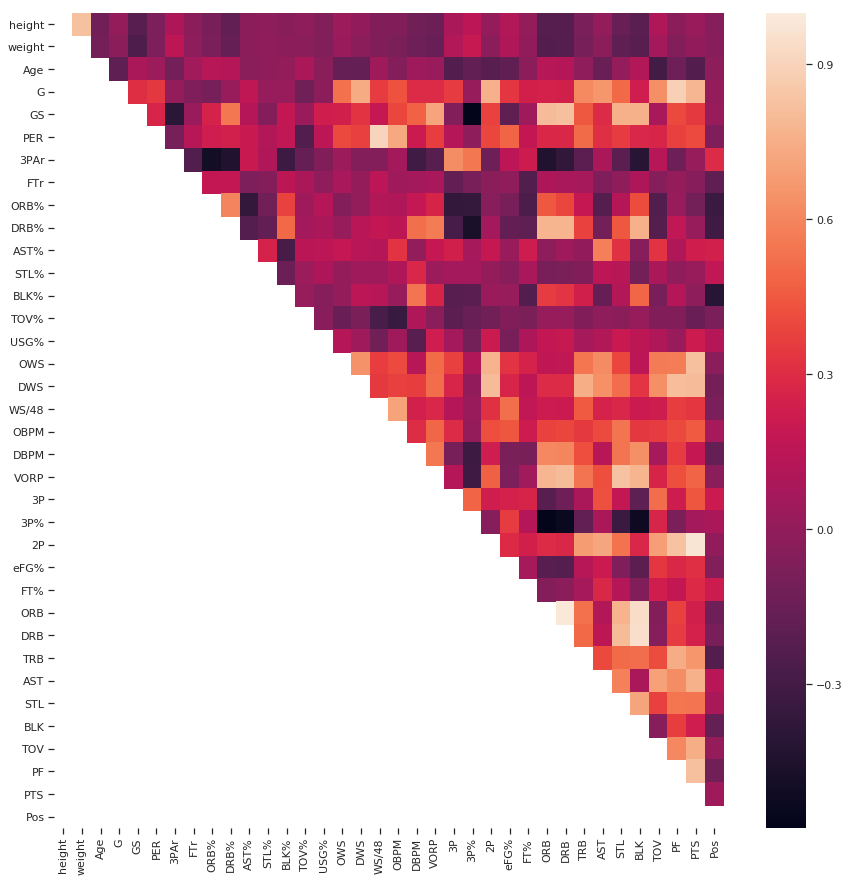

In [34]:
data = pws.copy()
data['Pos'] = Pos_le
data.head()
show_cor(data)

In [35]:
data.head()

,height,weight,Age,G,GS,PER,3PAr,FTr,ORB%,DRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS/48,OBPM,DBPM,VORP,3P,3P%,2P,eFG%,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Pos
0,180.0,77.0,31.0,50.500000,80.0,25.50,0.001,0.427500,11.4,28.6,13.5,1.5,2.3,16.6,21.1,-2.000000e-01,2.25,0.261000,-0.7,1.7,1.8,0.0,0.0,108.0,0.294500,0.674500,259.0,664.0,364.500000,126.5,80.0,104.0,14.0,157.000000,330.000000,4
1,188.0,83.0,29.0,49.666667,80.0,20.60,0.001,0.361667,11.4,28.6,13.5,1.5,2.3,16.6,21.1,3.700743e-17,0.70,0.176667,-0.7,1.7,1.8,0.0,0.0,67.0,0.307333,0.648333,259.0,664.0,273.666667,98.0,80.0,104.0,14.0,84.333333,185.666667,4
2,193.0,86.0,25.0,68.800000,80.0,17.52,0.001,0.208800,11.4,28.6,13.5,1.5,2.3,16.6,21.1,3.000000e-01,2.40,0.127400,-0.7,1.7,1.8,0.0,0.0,271.2,0.362200,0.676800,259.0,664.0,429.200000,223.2,80.0,104.0,14.0,206.600000,646.400000,3
3,196.0,88.0,24.0,11.750000,80.0,25.50,0.001,0.499250,11.4,28.6,13.5,1.5,2.3,16.6,21.1,-4.500000e-01,0.00,0.261000,-0.7,1.7,1.8,0.0,0.0,17.0,0.252250,0.574000,259.0,664.0,501.000000,13.0,80.0,104.0,14.0,28.000000,49.500000,1
4,178.0,79.0,22.0,63.000000,80.0,25.50,0.001,0.321000,11.4,28.6,13.5,1.5,2.3,16.6,21.1,3.850000e+00,1.75,0.261000,-0.7,1.7,1.8,0.0,0.0,374.5,0.365500,0.768500,259.0,664.0,445.500000,275.5,80.0,104.0,14.0,114.000000,1003.000000,2


In [0]:
from sklearn.neighbors import KNeighborsClassifier as KNC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

In [0]:
X_train, X_test, y_train, y_test = train_test_split(pws_norm, Pos_le, test_size=0.2, random_state=42)

In [38]:
knc = KNC(n_neighbors=9, weights='distance', algorithm = 'auto')
knc.fit(X_train, y_train)
print(knc.score(X_test, y_test))
y_pred = knc.predict(X_test)

0.5535714285714286


In [0]:
from sklearn.model_selection import GridSearchCV

In [40]:
parameters = {'n_neighbors': list(range(1,25,2)), 'weights': ['uniform', 'distance'], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}
grid = GridSearchCV(knc, parameters)
grid.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=9, p=2,
                                            weights='distance'),
             iid='warn', n_jobs=None,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21,
                                         23],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [41]:
grid.best_params_

{'algorithm': 'auto', 'n_neighbors': 15, 'weights': 'distance'}

In [42]:
grid.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                     weights='distance')

In [43]:
grid.best_score_

0.5117984693877551

In [0]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

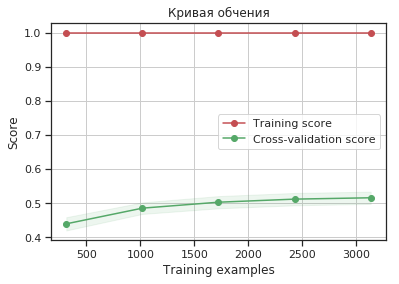

In [45]:
title = "Кривая обчения"
estimator = KNC(n_neighbors=9, weights='distance', algorithm = 'auto')
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
X = pws_norm
y = Pos_le
plot_learning_curve(estimator, title, X, y, cv=cv, n_jobs=4)

plt.show()